In [7]:
function readCollIn(f,first,last)
    # this reads in a csv file as a big ol' array
    r=0
    data = readdlm(f,',',String,'\n')
    return data[first:last]
end

function convertData(data)
    # this assumes all the data presented are floats except the last one which is a boolean/ also now a float
    last = length(data)
    converted = zeros(last)
    for i=1:last-1
        converted[i] = parse(Float64,data[i])
    end
    #converted[last] = parse(Bool,data[last])
    converted[last] = parse(Float64,data[last])
    return converted
end

function appendLists(data,r,v,t,E1, pr1, pz1, E2, pr2, pz2,Eion1,prion1,pzion1,Eion2,prion2,pzion2,ion,minD,vPerp,cross)
    # lists in Julia are appended in place with the append! function
    append!(r,data[1]);append!(v,data[2]);append!(t,data[3])
    #append!(E1,data[4]);append!(pr1,data[5]);append!(pz1,data[6]);append!(E2,data[7]);append!(pr2,data[8]);append!(pz2,data[9])
    #append!(Eion1,data[10]);append!(prion1,data[11]);append!(pzion1,data[12]);append!(Eion2,data[13]);append!(prion2,data[14]);append!(pzion2,data[15]);append!(ion,data[16])
    #append!(minD,data[17]);append!(vPerp,data[18]);append!(cross,data[19])
    append!(minD,data[4]);append!(vPerp,data[5]);append!(cross,data[6])
    return r,v,t,E1, pr1, pz1, E2, pr2, pz2,Eion1,prion1,pzion1,Eion2,prion2,pzion2,ion,minD,vPerp,cross
end

function plotThing(Nc,Ni,dt,dthing,colls,ions,first,last,title1,xlabel1,ylabel1)
    """
    Nc,Ni are the numbers of collisional particles and ions to plot
    first,last are the bounds 
    colls,ions are the vectors of what we want to plot for 
    dt,dthing are the time step and the step of the thing we want to plot for
    """
    # Now we plot their positions over time
    for i=1:Nc
        plot(dt.*range(first,last),dthing.*colls[i,first:last])
    end
    for i=1:Ni
        plot(dt.*range(first,last),dthing.*ions[i,first:last])
    end
    xlabel(xlabel1)
    ylabel(ylabel1)
    title(title1)
    show()    
end

function plotPieceWise(Nc,Ni,dthing1,dthing2,colls1,ions1,colls2,ions2,first,last,title1,xlabel1,ylabel1,xlow,xhigh,ylow,yhigh)
    """
    Nc,Ni are the numbers of collisional particles and ions to plot
    first,last are the bounds 
    colls,ions are the vectors of what we want to plot for 
    dthing1,dthing2 are the step of the first param we want to plot and the step of the second param we want to plot for
    """
    for i=1:Nc
        scatter(dr.*rcolls[i,first:last],dz.*zcolls[i,first:last])
    end
    for i=1:Ni
        scatter(dr.*rs[i,first:last],dz.*zs[i,first:last])
    end

    xlabel(xlabel1)
    ylabel(ylabel1)
    title(title1)

    ax = gca()
    # add new limits from 0 - 100
    ax[:set_xlim]([xlow,xhigh])
    ax[:set_ylim]([ylow,yhigh])
    show()
end

function subPlotThings(N1,N2,dt,dthing1,dthing2,thing1,thing2,first,last,title1,xlabel1,ylabel1,ylabel2)
    """
    N1,N2 are the numbers of particles to plot
    first,last are the bounds 
    colls,ions are the vectors of what we want to plot for 
    dthing1,dthing2 are the step of the first param we want to plot and the step of the second param we want to plot for
    """
    subplot(211)
    for i=1:Ni
        plot(dt.*range(first,last),dthing1.*thing1[i,first:last])
    end
    #xlabel("Time (s)")
    ylabel(ylabel1)
    subplot(212)
    for i=1:Ni
        plot(dt.*range(first,last),dthing2.*thing2[i,first:last])
    end
    xlabel(xlabel1)
    ylabel(ylabel2)
    suptitle(title1)
    show()
end 

function binPlotThing(xVector,yVector,Nbins,title1,xLabel,yLabel,xlow,xhigh,useYerr=true)
    # first we'll sort the xVector and yVector so that they represent matched coordinates of the xvector ascending
    perm = sortperm(xVector)
    newX = xVector[perm]; newY = yVector[perm]
    
    # next we get the average and std from the binned values
    binSize = length(newX)÷ Nbins
    aveX = zeros(Nbins);aveY = zeros(Nbins)
    stdX = zeros(Nbins);stdY = zeros(Nbins)
    for i=1:Nbins
        j=(i-1)*binSize+1
        aveX[i] = mean(newX[j:j+binSize-1]);aveY[i] = mean(newY[j:j+binSize-1]) 
        stdX[i] = std(newX[j:j+binSize-1]);stdY[i] = std(newY[j:j+binSize-1]) 
    end
    
#     println("aveX = ",aveX);println("aveY = ",aveY)
#      println("stdX = ",stdX);println("stdY = ",stdY)
    # next we plot the results with their error bars
    if useYerr
         errorbar(aveX,aveY,xerr=stdX,yerr=stdY./binSize^0.5,fmt="o")
    else
        errorbar(aveX,aveY,xerr=stdX,fmt="o")
    end
    xlabel(xLabel)
    ylabel(yLabel)
    title(title1)
    ax = gca()
    # add new limits from 0 - 100
    ax[:set_xlim]([xlow,xhigh])
    show()
end
# data has the form of [r,v,t,E1, pr1, pz1, E2, pr2, pz2,Eion1,prion1,pzion1,Eion2,prion2,pzion2,ion,minD,vPerp,cross]

binPlotThing (generic function with 2 methods)

In [36]:
using PyCall,PyPlot,Statistics,DelimitedFiles
#the next bundle of cells import test6-12.csv and combine all their data into one array which is then written to a new file

# first we import the test6 set
file = "test6.csv"
# f = open(file,"r")
#     eof = length(readlines(f))
# close(f)
eof = 36517
first =2 ; last = first+18
r=[];v=[];t=[];E1=[];pr1=[];pz1=[];E2=[];pr2=[];pz2=[];Eion1=[];prion1=[];pzion1=[];Eion2=[];prion2=[];pzion2=[];ion=[];minD=[];vPerp=[];cross=[]
#first =21 ; last = first+18
for i=2:6:eof-6
    data = readCollIn(file,i,i+6)
    data = convertData(data)
    #println(data)
    r,v,t,minD,vPerp,cross = appendLists(data,r,v,t,E1, pr1, pz1, E2, pr2, pz2,Eion1,prion1,pzion1,Eion2,prion2,pzion2,ion,minD,vPerp,cross)
end
println(r[1])

0.0


In [37]:
# sanity test
np = pyimport("numpy")
println(v[length(r)])
println(length(cross))
println(length(r))
println(length(v))
println(cross[1])
println(np.sum(cross))
println(r[1])

4250.0
6084
6085
6085
1.0
4290.0
0.0


In [38]:
# Now we create a mega-vector of r,v,cross so that we can print that shit out nicely
crossing = [[0.0],[50.0],[0.0]]
r = r.*0.1 # this set of radii was written an order of magnitude too large
for i=2:length(r)
    append!(crossing[1],r[i])
    append!(crossing[2],v[i])
    append!(crossing[3],cross[i-1])
end
println("run 6")

In [39]:
# next, test7
file = "test7.csv"
f = open(file,"r")
    eof = length(readlines(f))
close(f)
first =2 ; last = first+6
r=[];v=[];t=[];E1=[];pr1=[];pz1=[];E2=[];pr2=[];pz2=[];Eion1=[];prion1=[];pzion1=[];Eion2=[];prion2=[];pzion2=[];ion=[];minD=[];vPerp=[];cross=[]
for i=2:6:eof-6
    data = readCollIn(file,i,i+6)
    data = convertData(data)
    #println(data)
    r,v,t,minD,vPerp,cross = appendLists(data,r,v,t,E1, pr1, pz1, E2, pr2, pz2,Eion1,prion1,pzion1,Eion2,prion2,pzion2,ion,minD,vPerp,cross)
end
println(r[1])

LoadError: BoundsError: attempt to access 2131×1 Matrix{String} at index [2126:2132]

In [40]:
# sanity test
np = pyimport("numpy")
println(v[length(r)])
println(length(cross))
println(length(r))
println(length(v))
println(cross[1])
println(np.sum(cross))
println(r[1])

700.0
353
354
354
1.0
217.0
5.899999999999999e-10


In [41]:
append!(crossing[1],r[1])
append!(crossing[2],v[1])
append!(crossing[3],0.0)
for i=2:length(r)
    append!(crossing[1],r[i])
    append!(crossing[2],v[i])
    append!(crossing[3],cross[i-1])
end
println("run 7")

In [42]:
# next, test8
file = "test8.csv"
f = open(file,"r")
    eof = length(readlines(f))
close(f)
first =2 ; last = first+6
r=[];v=[];t=[];E1=[];pr1=[];pz1=[];E2=[];pr2=[];pz2=[];Eion1=[];prion1=[];pzion1=[];Eion2=[];prion2=[];pzion2=[];ion=[];minD=[];vPerp=[];cross=[]
for i=2:6:eof-6
    data = readCollIn(file,i,i+6)
    data = convertData(data)
    #println(data)
    r,v,t,minD,vPerp,cross = appendLists(data,r,v,t,E1, pr1, pz1, E2, pr2, pz2,Eion1,prion1,pzion1,Eion2,prion2,pzion2,ion,minD,vPerp,cross)
end
println(r[1])

LoadError: BoundsError: attempt to access 481×1 Matrix{String} at index [476:482]

In [43]:
# sanity test
np = pyimport("numpy")
println(v[length(r)])
println(length(cross))
println(length(r))
println(length(v))
println(cross[1])
println(np.sum(cross))
println(r[1])

350.0
78
79
79
1.0
56.0
7.5e-10


In [45]:
append!(crossing[1],r[1])
append!(crossing[2],v[1])
append!(crossing[3],0.0)
for i=2:length(r)
    append!(crossing[1],r[i])
    append!(crossing[2],v[i])
    append!(crossing[3],cross[i-1])
end
println("run 8")

In [46]:
# next, test9
file = "test9.csv"
f = open(file,"r")
    eof = length(readlines(f))
close(f)
first =2 ; last = first+6
r=[];v=[];t=[];E1=[];pr1=[];pz1=[];E2=[];pr2=[];pz2=[];Eion1=[];prion1=[];pzion1=[];Eion2=[];prion2=[];pzion2=[];ion=[];minD=[];vPerp=[];cross=[]
for i=2:6:eof-6
    data = readCollIn(file,i,i+6)
    data = convertData(data)
    #println(data)
    r,v,t,minD,vPerp,cross = appendLists(data,r,v,t,E1, pr1, pz1, E2, pr2, pz2,Eion1,prion1,pzion1,Eion2,prion2,pzion2,ion,minD,vPerp,cross)
end
println(r[1])

LoadError: BoundsError: attempt to access 1081×1 Matrix{String} at index [1076:1082]

In [48]:
# sanity test
np = pyimport("numpy")
println(v[length(r)])
println(length(cross))
println(length(r))
println(length(v))
println(cross[1])
println(np.sum(cross))
println(r[1])
println(v[1])

450.0
178
179
179
1.0
104.0
7.999999999999999e-10
50.0


In [49]:
append!(crossing[1],r[1])
append!(crossing[2],v[1])
append!(crossing[3],0.0)
for i=2:length(r)
    append!(crossing[1],r[i])
    append!(crossing[2],v[i])
    append!(crossing[3],cross[i-1])
end
println("run 9")

run 9


In [52]:
# next, test10
file = "test10.csv"
f = open(file,"r")
    eof = length(readlines(f))
close(f)
first =2 ; last = first+6
r=[];v=[];t=[];E1=[];pr1=[];pz1=[];E2=[];pr2=[];pz2=[];Eion1=[];prion1=[];pzion1=[];Eion2=[];prion2=[];pzion2=[];ion=[];minD=[];vPerp=[];cross=[]
for i=2:6:eof-6
    data = readCollIn(file,i,i+6)
    data = convertData(data)
    #println(data)
    r,v,t,minD,vPerp,cross = appendLists(data,r,v,t,E1, pr1, pz1, E2, pr2, pz2,Eion1,prion1,pzion1,Eion2,prion2,pzion2,ion,minD,vPerp,cross)
end
println(r[1])

LoadError: BoundsError: attempt to access 1933×1 Matrix{String} at index [1928:1934]

In [53]:
# sanity test
np = pyimport("numpy")
println(v[length(r)])
println(length(cross))
println(length(r))
println(length(v))
println(cross[1])
println(np.sum(cross))
println(r[1])
println(v[1])

150.0
320
321
321
1.0
260.0
9.8e-10
50.0


In [54]:
append!(crossing[1],r[1])
append!(crossing[2],v[1])
append!(crossing[3],0.0)
for i=2:length(r)
    append!(crossing[1],r[i])
    append!(crossing[2],v[i])
    append!(crossing[3],cross[i-1])
end
println("run 10")

run 10


In [55]:
# next, test11
file = "test11.csv"
f = open(file,"r")
    eof = length(readlines(f))
close(f)
first =2 ; last = first+6
r=[];v=[];t=[];E1=[];pr1=[];pz1=[];E2=[];pr2=[];pz2=[];Eion1=[];prion1=[];pzion1=[];Eion2=[];prion2=[];pzion2=[];ion=[];minD=[];vPerp=[];cross=[]
for i=2:6:eof-6
    data = readCollIn(file,i,i+6)
    data = convertData(data)
    #println(data)
    r,v,t,minD,vPerp,cross = appendLists(data,r,v,t,E1, pr1, pz1, E2, pr2, pz2,Eion1,prion1,pzion1,Eion2,prion2,pzion2,ion,minD,vPerp,cross)
end
println(r[1])

LoadError: BoundsError: attempt to access 223×1 Matrix{String} at index [218:224]

In [56]:
# sanity test
np = pyimport("numpy")
println(v[length(r)])
println(length(cross))
println(length(r))
println(length(v))
println(cross[1])
println(np.sum(cross))
println(r[1])
println(v[1])

200.0
35
36
36
1.0
34.0
2.04e-9
100.0


In [57]:
append!(crossing[1],r[1])
append!(crossing[2],v[1])
append!(crossing[3],1.0)
for i=2:length(r)
    append!(crossing[1],r[i])
    append!(crossing[2],v[i])
    append!(crossing[3],cross[i-1])
end
println("run 11")

run 11


In [58]:
# next, test12
file = "test12.csv"
f = open(file,"r")
    eof = length(readlines(f))
close(f)
first =2 ; last = first+6
r=[];v=[];t=[];E1=[];pr1=[];pz1=[];E2=[];pr2=[];pz2=[];Eion1=[];prion1=[];pzion1=[];Eion2=[];prion2=[];pzion2=[];ion=[];minD=[];vPerp=[];cross=[]
for i=2:6:eof-6
    data = readCollIn(file,i,i+6)
    data = convertData(data)
    #println(data)
    r,v,t,minD,vPerp,cross = appendLists(data,r,v,t,E1, pr1, pz1, E2, pr2, pz2,Eion1,prion1,pzion1,Eion2,prion2,pzion2,ion,minD,vPerp,cross)
end
println(r[1])

LoadError: BoundsError: attempt to access 253×1 Matrix{String} at index [248:254]

In [59]:
# sanity test
np = pyimport("numpy")
println(v[length(r)])
println(length(cross))
println(length(r))
println(length(v))
println(cross[1])
println(np.sum(cross))
println(r[1])
println(v[1])

150.0
40
41
41
1.0
34.0
3.24e-9
100.0


In [60]:
append!(crossing[1],r[1])
append!(crossing[2],v[1])
append!(crossing[3],1.0)
for i=2:length(r)
    append!(crossing[1],r[i])
    append!(crossing[2],v[i])
    append!(crossing[3],cross[i-1])
end
println("run 12")

run 12


0.0


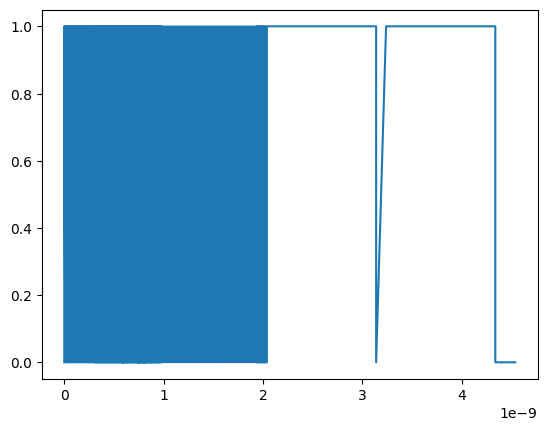

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f973b551e80>

In [66]:
# now we have all the bits
println(cross[length(cross)])
plot(crossing[1],crossing[3])

In [95]:
#println("check ",rsorted[:,2000])
println("check ",rsorted[:,2000])

check [1.9000000000000002e-10, 1.0, 5000.0]


In [111]:
# now we just need to sort all these values and pop them in one big .csv and find the cutoff for each speed that takes us from crossing to not crossing
# reminder that crossing[1] are all the impact parameters
# crossing[2] are all the impact speeds
# all the collisions are at 90 degrees
# there are 2 ions in the simulation
# these two ions are trapped at wr = 2pi *3e6 and wz = 2pi * 1e6
# these simulations have a variable time step 
# Like I said previously, this region sorts all the values. I discovered no built in way to sort an array like this, I'm sure there's some sort of permutation sort system I could use, but this was quicker to implement

rs = crossing[1]
rs = sort(rs)
rUnique = []
rLast = 1e10
for r in rs
    if r != rLast
        append!(rUnique,r)
        rLast = r
    end
end
#print(rs)
vs = crossing[2]
vs = sort(vs)
vUnique = []
vLast = 1e10
for v in vs
    if v != vLast
        append!(vUnique,v)
        vLast = v
    end
end
#print(vs)
# rsorted = np.array(crossing)
# sort!(rsorted,dims=1)
# (trash,numpoints) = size(rsorted)

startData = np.array(crossing)
println("Crossing",startData[:,700])
endData = np.ones((length(rUnique),length(vUnique))).*-1

its = 0
for i=1:length(rs) # i for the data
    for j=1:length(rUnique) # j for the r destination
        for k=1:length(vUnique) # k for the v destination
            if rUnique[j] == startData[1,i] && vUnique[k] == startData[2,i]
                its = its+1
                endData[j,k] = startData[3,i]
                println("its = ",its)
            end
        end
    end
end

# now we create sub-arrays for all the velocities
# rlast = -1.0
# newRs = []; newVs = []; newCross = []
# vTemp = []; crossTemp = []
# for i=1:numpoints
#     println("i = ",i)
#     radius = rsorted[1,i]
#     speed = rsorted[2,i]
#     cross = rsorted[3,i]
#     if radius == rlast
#         append!(vTemp,speed)
#         append!(crossTemp,cross)
#     end
#     if radius != rlast
#         for j=1:length(vTemp)
#             println("vTemp = ",vTemp)
#             println("crossTemp = ",crossTemp)
#             vsorted = np.array([vTemp,crossTemp])
#             println("vsorted = ",vsorted)
#             sort!(vsorted,dims=1)
#             append!(newVs,vsorted[1,:])
#             append!(newCross,vsorted[2,:])
#         end
#         rlast = radius
#         vTemp = [speed]
#         crossTemp = [cross]
#     end
    
#     append!(newRs,radius)
# end

Crossing[6.0e-11, 5000.0, 1.0]
its = 1
its = 2
its = 3
its = 4
its = 5
its = 6
its = 7
its = 8
its = 9
its = 10
its = 11
its = 12
its = 13
its = 14
its = 15
its = 16
its = 17
its = 18
its = 19
its = 20
its = 21
its = 22
its = 23
its = 24
its = 25
its = 26
its = 27
its = 28
its = 29
its = 30
its = 31
its = 32
its = 33
its = 34
its = 35
its = 36
its = 37
its = 38
its = 39
its = 40
its = 41
its = 42
its = 43
its = 44
its = 45
its = 46
its = 47
its = 48
its = 49
its = 50
its = 51
its = 52
its = 53
its = 54
its = 55
its = 56
its = 57
its = 58
its = 59
its = 60
its = 61
its = 62
its = 63
its = 64
its = 65
its = 66
its = 67
its = 68
its = 69
its = 70
its = 71
its = 72
its = 73
its = 74
its = 75
its = 76
its = 77
its = 78
its = 79
its = 80
its = 81
its = 82
its = 83
its = 84
its = 85
its = 86
its = 87
its = 88
its = 89
its = 90
its = 91
its = 92
its = 93
its = 94
its = 95
its = 96
its = 97
its = 98
its = 99
its = 100
its = 101
its = 102
its = 103
its = 104
its = 105
its = 106
its = 107
its = 1

its = 861
its = 862
its = 863
its = 864
its = 865
its = 866
its = 867
its = 868
its = 869
its = 870
its = 871
its = 872
its = 873
its = 874
its = 875
its = 876
its = 877
its = 878
its = 879
its = 880
its = 881
its = 882
its = 883
its = 884
its = 885
its = 886
its = 887
its = 888
its = 889
its = 890
its = 891
its = 892
its = 893
its = 894
its = 895
its = 896
its = 897
its = 898
its = 899
its = 900
its = 901
its = 902
its = 903
its = 904
its = 905
its = 906
its = 907
its = 908
its = 909
its = 910
its = 911
its = 912
its = 913
its = 914
its = 915
its = 916
its = 917
its = 918
its = 919
its = 920
its = 921
its = 922
its = 923
its = 924
its = 925
its = 926
its = 927
its = 928
its = 929
its = 930
its = 931
its = 932
its = 933
its = 934
its = 935
its = 936
its = 937
its = 938
its = 939
its = 940
its = 941
its = 942
its = 943
its = 944
its = 945
its = 946
its = 947
its = 948
its = 949
its = 950
its = 951
its = 952
its = 953
its = 954
its = 955
its = 956
its = 957
its = 958
its = 959
its = 960


its = 1629
its = 1630
its = 1631
its = 1632
its = 1633
its = 1634
its = 1635
its = 1636
its = 1637
its = 1638
its = 1639
its = 1640
its = 1641
its = 1642
its = 1643
its = 1644
its = 1645
its = 1646
its = 1647
its = 1648
its = 1649
its = 1650
its = 1651
its = 1652
its = 1653
its = 1654
its = 1655
its = 1656
its = 1657
its = 1658
its = 1659
its = 1660
its = 1661
its = 1662
its = 1663
its = 1664
its = 1665
its = 1666
its = 1667
its = 1668
its = 1669
its = 1670
its = 1671
its = 1672
its = 1673
its = 1674
its = 1675
its = 1676
its = 1677
its = 1678
its = 1679
its = 1680
its = 1681
its = 1682
its = 1683
its = 1684
its = 1685
its = 1686
its = 1687
its = 1688
its = 1689
its = 1690
its = 1691
its = 1692
its = 1693
its = 1694
its = 1695
its = 1696
its = 1697
its = 1698
its = 1699
its = 1700
its = 1701
its = 1702
its = 1703
its = 1704
its = 1705
its = 1706
its = 1707
its = 1708
its = 1709
its = 1710
its = 1711
its = 1712
its = 1713
its = 1714
its = 1715
its = 1716
its = 1717
its = 1718
its = 1719

its = 2417
its = 2418
its = 2419
its = 2420
its = 2421
its = 2422
its = 2423
its = 2424
its = 2425
its = 2426
its = 2427
its = 2428
its = 2429
its = 2430
its = 2431
its = 2432
its = 2433
its = 2434
its = 2435
its = 2436
its = 2437
its = 2438
its = 2439
its = 2440
its = 2441
its = 2442
its = 2443
its = 2444
its = 2445
its = 2446
its = 2447
its = 2448
its = 2449
its = 2450
its = 2451
its = 2452
its = 2453
its = 2454
its = 2455
its = 2456
its = 2457
its = 2458
its = 2459
its = 2460
its = 2461
its = 2462
its = 2463
its = 2464
its = 2465
its = 2466
its = 2467
its = 2468
its = 2469
its = 2470
its = 2471
its = 2472
its = 2473
its = 2474
its = 2475
its = 2476
its = 2477
its = 2478
its = 2479
its = 2480
its = 2481
its = 2482
its = 2483
its = 2484
its = 2485
its = 2486
its = 2487
its = 2488
its = 2489
its = 2490
its = 2491
its = 2492
its = 2493
its = 2494
its = 2495
its = 2496
its = 2497
its = 2498
its = 2499
its = 2500
its = 2501
its = 2502
its = 2503
its = 2504
its = 2505
its = 2506
its = 2507

its = 3175
its = 3176
its = 3177
its = 3178
its = 3179
its = 3180
its = 3181
its = 3182
its = 3183
its = 3184
its = 3185
its = 3186
its = 3187
its = 3188
its = 3189
its = 3190
its = 3191
its = 3192
its = 3193
its = 3194
its = 3195
its = 3196
its = 3197
its = 3198
its = 3199
its = 3200
its = 3201
its = 3202
its = 3203
its = 3204
its = 3205
its = 3206
its = 3207
its = 3208
its = 3209
its = 3210
its = 3211
its = 3212
its = 3213
its = 3214
its = 3215
its = 3216
its = 3217
its = 3218
its = 3219
its = 3220
its = 3221
its = 3222
its = 3223
its = 3224
its = 3225
its = 3226
its = 3227
its = 3228
its = 3229
its = 3230
its = 3231
its = 3232
its = 3233
its = 3234
its = 3235
its = 3236
its = 3237
its = 3238
its = 3239
its = 3240
its = 3241
its = 3242
its = 3243
its = 3244
its = 3245
its = 3246
its = 3247
its = 3248
its = 3249
its = 3250
its = 3251
its = 3252
its = 3253
its = 3254
its = 3255
its = 3256
its = 3257
its = 3258
its = 3259
its = 3260
its = 3261
its = 3262
its = 3263
its = 3264
its = 3265

its = 3923
its = 3924
its = 3925
its = 3926
its = 3927
its = 3928
its = 3929
its = 3930
its = 3931
its = 3932
its = 3933
its = 3934
its = 3935
its = 3936
its = 3937
its = 3938
its = 3939
its = 3940
its = 3941
its = 3942
its = 3943
its = 3944
its = 3945
its = 3946
its = 3947
its = 3948
its = 3949
its = 3950
its = 3951
its = 3952
its = 3953
its = 3954
its = 3955
its = 3956
its = 3957
its = 3958
its = 3959
its = 3960
its = 3961
its = 3962
its = 3963
its = 3964
its = 3965
its = 3966
its = 3967
its = 3968
its = 3969
its = 3970
its = 3971
its = 3972
its = 3973
its = 3974
its = 3975
its = 3976
its = 3977
its = 3978
its = 3979
its = 3980
its = 3981
its = 3982
its = 3983
its = 3984
its = 3985
its = 3986
its = 3987
its = 3988
its = 3989
its = 3990
its = 3991
its = 3992
its = 3993
its = 3994
its = 3995
its = 3996
its = 3997
its = 3998
its = 3999
its = 4000
its = 4001
its = 4002
its = 4003
its = 4004
its = 4005
its = 4006
its = 4007
its = 4008
its = 4009
its = 4010
its = 4011
its = 4012
its = 4013

its = 4684
its = 4685
its = 4686
its = 4687
its = 4688
its = 4689
its = 4690
its = 4691
its = 4692
its = 4693
its = 4694
its = 4695
its = 4696
its = 4697
its = 4698
its = 4699
its = 4700
its = 4701
its = 4702
its = 4703
its = 4704
its = 4705
its = 4706
its = 4707
its = 4708
its = 4709
its = 4710
its = 4711
its = 4712
its = 4713
its = 4714
its = 4715
its = 4716
its = 4717
its = 4718
its = 4719
its = 4720
its = 4721
its = 4722
its = 4723
its = 4724
its = 4725
its = 4726
its = 4727
its = 4728
its = 4729
its = 4730
its = 4731
its = 4732
its = 4733
its = 4734
its = 4735
its = 4736
its = 4737
its = 4738
its = 4739
its = 4740
its = 4741
its = 4742
its = 4743
its = 4744
its = 4745
its = 4746
its = 4747
its = 4748
its = 4749
its = 4750
its = 4751
its = 4752
its = 4753
its = 4754
its = 4755
its = 4756
its = 4757
its = 4758
its = 4759
its = 4760
its = 4761
its = 4762
its = 4763
its = 4764
its = 4765
its = 4766
its = 4767
its = 4768
its = 4769
its = 4770
its = 4771
its = 4772
its = 4773
its = 4774

its = 5435
its = 5436
its = 5437
its = 5438
its = 5439
its = 5440
its = 5441
its = 5442
its = 5443
its = 5444
its = 5445
its = 5446
its = 5447
its = 5448
its = 5449
its = 5450
its = 5451
its = 5452
its = 5453
its = 5454
its = 5455
its = 5456
its = 5457
its = 5458
its = 5459
its = 5460
its = 5461
its = 5462
its = 5463
its = 5464
its = 5465
its = 5466
its = 5467
its = 5468
its = 5469
its = 5470
its = 5471
its = 5472
its = 5473
its = 5474
its = 5475
its = 5476
its = 5477
its = 5478
its = 5479
its = 5480
its = 5481
its = 5482
its = 5483
its = 5484
its = 5485
its = 5486
its = 5487
its = 5488
its = 5489
its = 5490
its = 5491
its = 5492
its = 5493
its = 5494
its = 5495
its = 5496
its = 5497
its = 5498
its = 5499
its = 5500
its = 5501
its = 5502
its = 5503
its = 5504
its = 5505
its = 5506
its = 5507
its = 5508
its = 5509
its = 5510
its = 5511
its = 5512
its = 5513
its = 5514
its = 5515
its = 5516
its = 5517
its = 5518
its = 5519
its = 5520
its = 5521
its = 5522
its = 5523
its = 5524
its = 5525

its = 6187
its = 6188
its = 6189
its = 6190
its = 6191
its = 6192
its = 6193
its = 6194
its = 6195
its = 6196
its = 6197
its = 6198
its = 6199
its = 6200
its = 6201
its = 6202
its = 6203
its = 6204
its = 6205
its = 6206
its = 6207
its = 6208
its = 6209
its = 6210
its = 6211
its = 6212
its = 6213
its = 6214
its = 6215
its = 6216
its = 6217
its = 6218
its = 6219
its = 6220
its = 6221
its = 6222
its = 6223
its = 6224
its = 6225
its = 6226
its = 6227
its = 6228
its = 6229
its = 6230
its = 6231
its = 6232
its = 6233
its = 6234
its = 6235
its = 6236
its = 6237
its = 6238
its = 6239
its = 6240
its = 6241
its = 6242
its = 6243
its = 6244
its = 6245
its = 6246
its = 6247
its = 6248
its = 6249
its = 6250
its = 6251
its = 6252
its = 6253
its = 6254
its = 6255
its = 6256
its = 6257
its = 6258
its = 6259
its = 6260
its = 6261
its = 6262
its = 6263
its = 6264
its = 6265
its = 6266
its = 6267
its = 6268
its = 6269
its = 6270
its = 6271
its = 6272
its = 6273
its = 6274
its = 6275
its = 6276
its = 6277

its = 6949
its = 6950
its = 6951
its = 6952
its = 6953
its = 6954
its = 6955
its = 6956
its = 6957
its = 6958
its = 6959
its = 6960
its = 6961
its = 6962
its = 6963
its = 6964
its = 6965
its = 6966
its = 6967
its = 6968
its = 6969
its = 6970
its = 6971
its = 6972
its = 6973
its = 6974
its = 6975
its = 6976
its = 6977
its = 6978
its = 6979
its = 6980
its = 6981
its = 6982
its = 6983
its = 6984
its = 6985
its = 6986
its = 6987
its = 6988
its = 6989
its = 6990
its = 6991
its = 6992
its = 6993
its = 6994
its = 6995
its = 6996
its = 6997
its = 6998
its = 6999
its = 7000
its = 7001
its = 7002
its = 7003
its = 7004
its = 7005
its = 7006
its = 7007
its = 7008
its = 7009
its = 7010
its = 7011
its = 7012
its = 7013
its = 7014
its = 7015
its = 7016
its = 7017
its = 7018
its = 7019
its = 7020
its = 7021
its = 7022
its = 7023
its = 7024
its = 7025
its = 7026
its = 7027
its = 7028
its = 7029
its = 7030
its = 7031
its = 7032
its = 7033
its = 7034
its = 7035
its = 7036
its = 7037
its = 7038
its = 7039

In [117]:
# This is where we write the output to a .csv to be fair, it's written in a way that needs some light editing in excell to be what I want
fileName = "combinedScan.csv"
open(fileName,"w") do file # append to a file
    writedlm(file,[vUnique],",") # write the output
end
open(fileName,"a") do file # append to a file
    writedlm(file,rUnique,",") # write the output
end
for i=1:length(vUnique)
    
    open(fileName,"a") do file # append to a file
        #writedlm(file,"\n",",") # write the output
        writedlm(file,[endData[:,i]],",") # write the output
    end
end

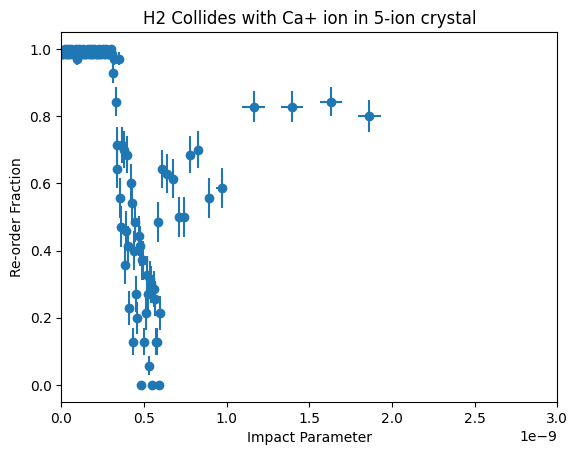

In [64]:
binPlotThing(crossing[1],crossing[3],100,"H2 Collides with Ca+ ion in 5-ion crystal","Impact Parameter","Re-order Fraction",0e-6,3.e-9,true)

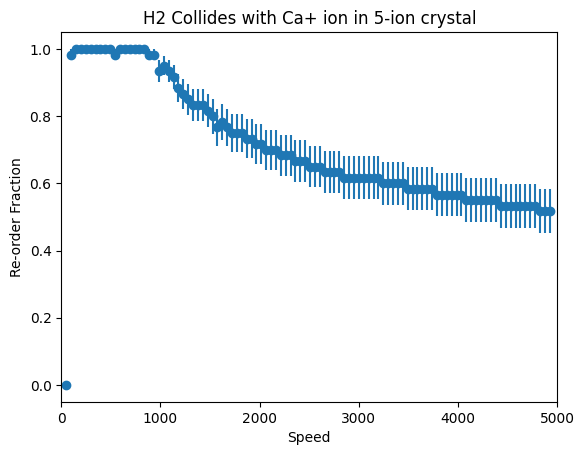

In [29]:
binPlotThing(crossing[2],crossing[3],100,"H2 Collides with Ca+ ion in 5-ion crystal","Speed","Re-order Fraction",0e-6,5e3,true)

In [54]:
# This cell uses the above data to determine which of these collisions are langevin collisions
# These all read as langevin, which means something is wrong with my minimum distance calculation
# I might switch the calc to measure kinetic vs potential energy  as the msmt
# I abandoned this langevin calc, better to just compare collision distances

langevin = []
for i=1:length(r)
    #dist = r[i]-
    #p = alpha * q/(4*pi*eps0*dist^2) # induced dipole moment
    #potE = (q*2*p)/(4*pi*eps0*dist^3) # potential energy assuming initial radius as distance (treating it as impact parameter)
    #kinE = 0.5*m*(v^2) # kinetic energy at start
    
    impactB = min(r[i]-1.77e-5,r[i]-1.905e-5)
    if minD[i]<impactB
        append!(langevin,true)
    elseif minD[i]<1e-7
        append!(langevin,true)
    else
        append!(langevin,false)
    end
end
print(langevin)

Any[false, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, false, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true, true

false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false,

 false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false

, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, false, fals

In [142]:
np = pyimport("numpy")

# This cell integrates reorder fraction across the impact parameters r
# We'll treat the rate of collision cross-section as a circle around each ion and treat the re-order rate as uniform in phi
freorder = np.zeros(100) # make variable lists, there are 100 velocities
binsize = np.zeros(100)
Rout = r[1]
Rin = 0.0
A = Rout^2
for i=1:convert(UInt32,round(length(r)) )
    if r[i] > Rout
        Rout = r[i]
        Rin = r[i-1]
        A+= Rout^2 - Rin^2
    end
    j = convert(UInt32,round(v[i]/50.0)) # the first velocity is 50, so this should go 1 to 80
    freorder[j]+=cross[i]*(Rout^2 - Rin^2) # we sum the reordering collisions
    binsize[j]+=1.0 # we track how many collisions we measure
end
freorder = freorder./binsize # we take the number of reorders over the binsize to get the reorder probability
println(A)

3.629025e-10


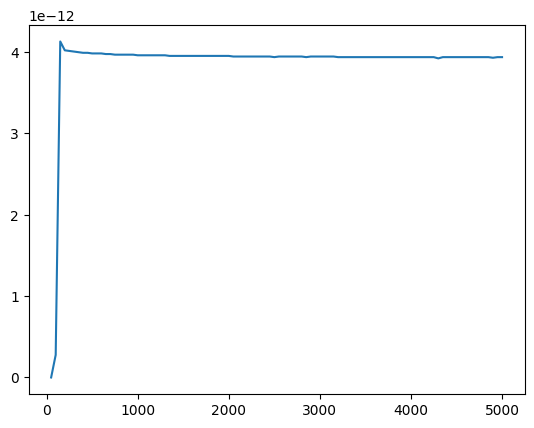

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd5a01c86d0>

In [143]:
plot(range(1,100).*50.0,freorder)

In [144]:
# Here we define a function that returns a normalized boltzman distribution (3D version) binned to 50,100,....5000
using SpecialFunctions
function Boltz(m,T,vmin=0,vmax=5000,bins=100)
    k = 1.386e-23 # boltzmann constant
    boltz = np.zeros(bins) # initialize vector
    dv = (vmax - vmin)/bins # define bin spacing in speed
    a = (k*T/m)^(1/2) # normalization constant for distribution function

    
    for i=1:bins
        vhere = vmin + i*dv # define speed of bin
        vlast = vhere-dv
        boltz[i] = (erf(vhere/(a*sqrt(2))) - sqrt(2/pi)*(vhere/a)*exp(-vhere^2/(2*a^2)) ) - (erf(vlast/(a*sqrt(2))) - sqrt(2/pi)*(vlast/a)*exp(-vlast^2/(2*a^2)) ) # here we use the cumulative distribution function and subtract the one-step down value from the this step value for the probability density in this slice
    end
    
    return boltz./np.sum(boltz) #return normalized vector
end

Boltz (generic function with 4 methods)

1.0

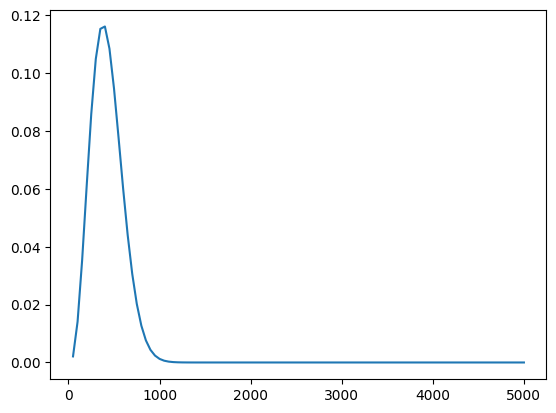

In [145]:
# we test our normalized boltzmann distribution
amu = 1.66*10^-27 # kg
Temp = 300
boltz = Boltz(40*amu,Temp,0,5000,100)
plot(range(1,100).*50.0,boltz)
print(np.sum(boltz))

3.938582033474647e-12

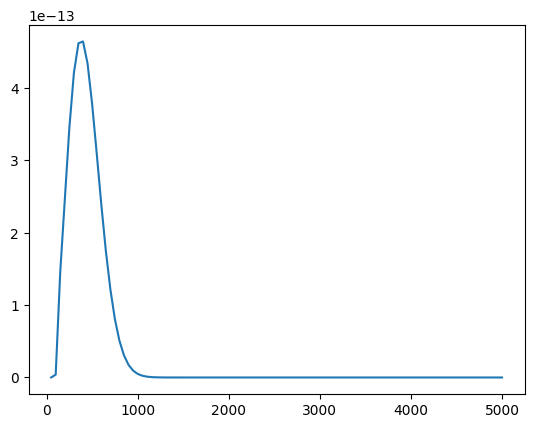

In [146]:
freorderT = boltz.*freorder
plot(range(1,100).*50.0,freorderT)
print(sum(freorderT))

1.181574610042394e-9

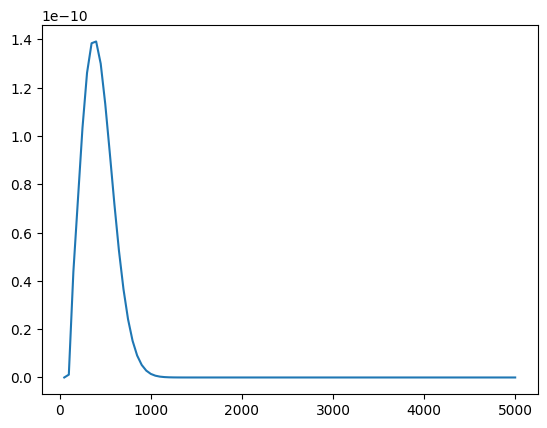

In [147]:
reorderRate = freorderT.*Temp # place-holder to get reorder rate scaling not holding pressure constant
plot(range(1,100).*50.0,reorderRate)
print(sum(reorderRate))

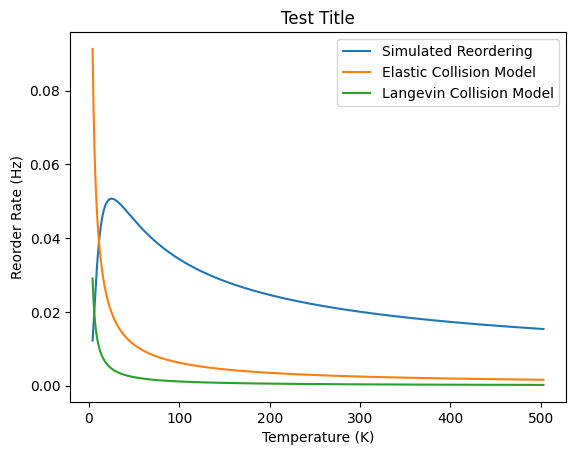

PyObject Text(0.5, 1.0, 'Test Title')

In [163]:
# Now that we know our reorder rates scale sensibly and our reorder probabilities appear to make sense
# Let's do re-order rate as a function of Temperature
nTemps = 500
startTemp = 4
fractOfTemp = np.zeros(nTemps)
rateOfTemp = np.zeros(nTemps)

A = 1.0 # pi*((r[1] - r[8000]))^2 # in m but I already wrapped area up in my earlier calc
k = 1.386e-23 # boltzmann constant
P = 1e-9 # let's just assume a pressure of about 1e-11 torr/mbar which is 1e-9 torr
#vave = np.sum(range(1,100).*50.0.*boltz) # gives the average speed for collision frequency

for i = 1:nTemps
    Temp = startTemp + i
    boltz = Boltz(40*amu,Temp,0,5000,100) # these are the weights for our average reordering rate
    vave = np.sum(range(1,100).*50.0.*boltz) # the average velocity for our temperature
    freorderT = boltz.*freorder
    fract = np.sum(freorderT) # complete weighted average
    reorderRate = fract*(P/(k*Temp))*A*vave # this is reorder chance times n*A*v 
    
    #MUSINGS it seems that the discrepancy could be caused by overestimating the collison rate for smaller impact params
    #since this is a 1d scan, I likely need to do the area part by weighting the fractional reordering by the size of each slice pi*(r[i]^2-[r[i-1]^2])
    
    # assign values
    fractOfTemp[i]= fract
    rateOfTemp[i] = reorderRate
end

#sigE = 5.08 * (mu*C4/(hbar^2*k*Temp))^(1/3)
#sigL = pi * (2*C4/(k*Temp))^(1/2) # rates are n*v*sigma where n is P/kT and v is sqrt(8kT/pi*m)
T = range(4,nTemps+3)
theoryRateE = 2.5e-3 .* (T./300).^(-5/6) # for elastic collision rate
theoryRateL = 3.88e-4 .* (T./300).^(-1) # for langevin collision rate


#plot(range(1,nTemps).*1.0,fractOfTemp)
plot(range(4,503).*1.0,rateOfTemp/20000) # note that this factor of 10000 is arbitrarily reducing things
plot(range(4,503).*1.0,theoryRateE)
plot(range(4,503).*1.0,theoryRateL)
legend(("Simulated Reordering","Elastic Collision Model","Langevin Collision Model"))
xlabel("Temperature (K)")
ylabel("Reorder Rate (Hz)")
title("Test Title")
#println("P = ",P)
#println("vave = ",vave)
#println("A = ",A)
#println(rateOfTemp)
# typically used cross-sections


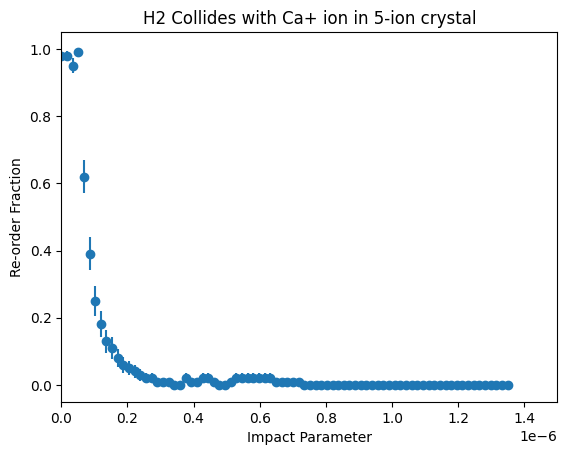

In [172]:
binPlotThing(r.-r[1],cross,80,"H2 Collides with Ca+ ion in 5-ion crystal","Impact Parameter","Re-order Fraction",0e-6,1.5e-6,true)

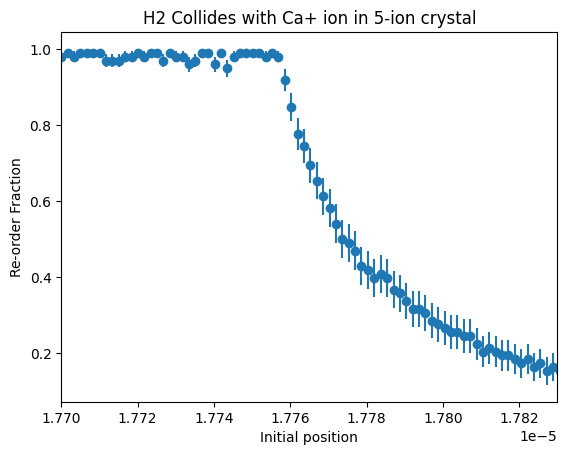

In [25]:
binPlotThing(r,cross,79,"H2 Collides with Ca+ ion in 5-ion crystal","Initial position","Re-order Fraction",1.770e-5,1.783e-5,true)

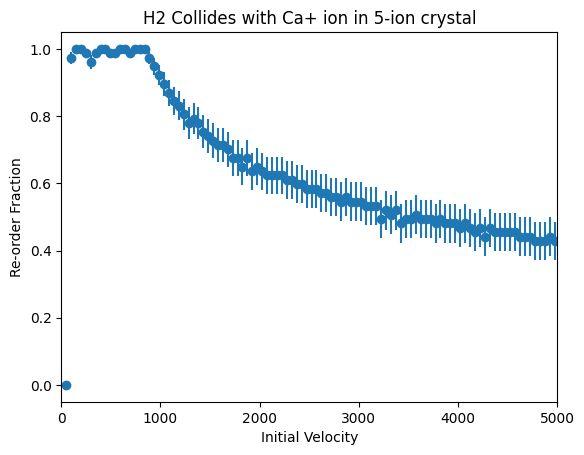

In [4]:
binPlotThing(v,cross,100,"H2 Collides with Ca+ ion in 5-ion crystal","Initial Velocity","Re-order Fraction",0.0,5e3,true)

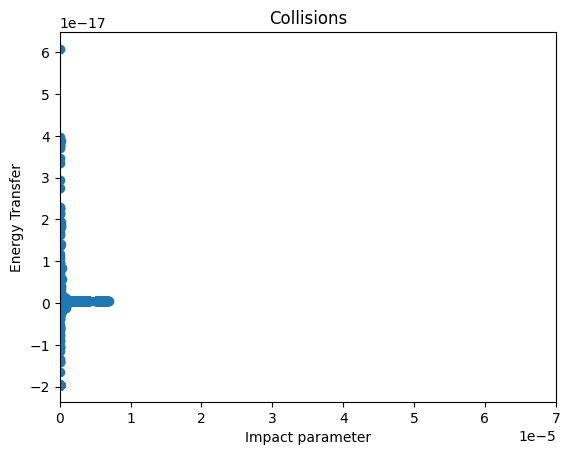

In [5]:
using PyCall,PyPlot,Statistics
Nc=1;Ni=5;dt=0.03e-9;dr=3e-9;
scatter(minD,(Eion2-Eion1))
xlabel("Impact parameter")
ylabel("Energy Transfer")
title("Collisions")
ax = gca()
ax[:set_xlim]([0.0,0.7e-4])
#ax[:set_ylim]([-2e-26,0.0])

show()    

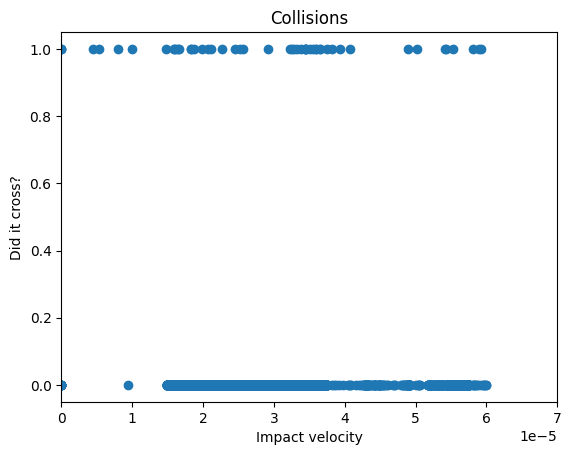

In [21]:
using PyCall,PyPlot
Nc=1;Ni=5;dt=0.03e-9;dr=3e-9;
scatter(minD,cross)
xlabel("Impact velocity")
ylabel("Did it cross?")
title("Collisions")
ax = gca()
ax[:set_xlim]([0.0,0.7e-4])
#ax[:set_ylim]([-2e-26,0.0])

show()    

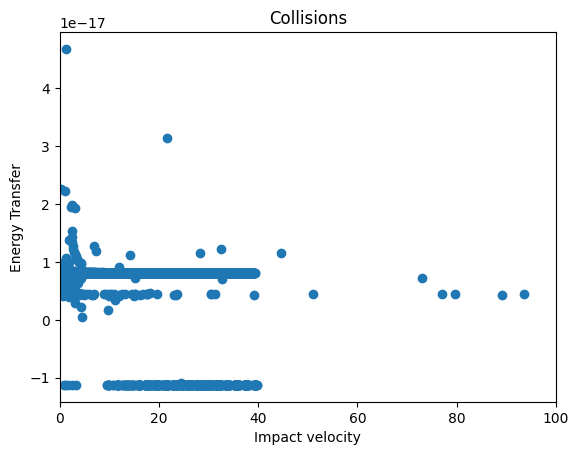

In [22]:
using PyCall,PyPlot
Nc=1;Ni=5;dt=0.03e-9;dr=3e-9;
scatter(vPerp,(Eion2-Eion1))
xlabel("Impact velocity")
ylabel("Energy Transfer")
title("Collisions")
ax = gca()
ax[:set_xlim]([0.0,1.0e2])
#ax[:set_ylim]([-2e-26,0.0])

show()   

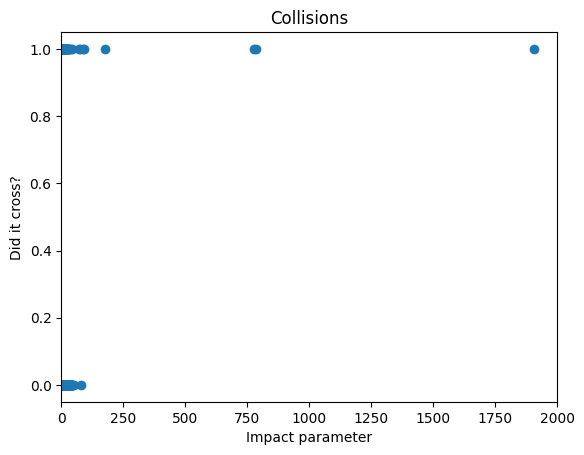

In [15]:
using PyCall,PyPlot
Nc=1;Ni=5;dt=0.03e-9;dr=3e-9;
scatter(vPerp,cross)
xlabel("Impact parameter")
ylabel("Did it cross?")
title("Collisions")
ax = gca()
ax[:set_xlim]([0.0,2.0e3])
#ax[:set_ylim]([-2e-26,0.0])

show()   

In [192]:
println(E2)

Any[-0.0012049850213057198, -0.0012049850213057202, -0.0012049850213057213, -0.0012049850213057224, -0.0012049850213057237, -0.001204985021305725, -0.001204985021305726, -0.0012049850213057271, -0.0012049850213057276, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.001204985021305692, -0.0012049850213056944, -0.001204985021305698, -0.0012049850213057029, -0.001204985021305708, -0.0012049850213057133, -0.0012049850213057178, -0.0012049850213057215, -0.001204985021305724, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213056463, -0.001204985021305

 -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213056463, -0.0012049850213056515, -0.00120498502130566, -0.001163319090468309, -0.0012049850213056818, -0.0012049850213056935, -0.001204985021305704, -0.0012049850213057124, -0.0012049850213057176, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213055819, -0.0012049850213055914, -0.0012049850213056061, -0.0012049850213056248, -0.0012049850213056454, -0.001204985021305666, -0.0012049850213056846, -0.0012049850213056994, -0.001204985021305709, -0.0012049850213057289, -0.001204985021305728

, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213055819, -0.0012049850213055914, -0.0012049850213056061, -0.0012049850213056248, -0.0012049850213056454, -0.001204985021305666, -0.0012049850213056846, -0.0012049850213056994, -0.001204985021305709, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213054992, -0.001204985021305514, -0.001204985021305537, -0.0012049850213055662, -0.0012049850213055983, -0.0012049850213056307, -0.0012049850213056597, -0.001204985021305683, -0.0012049850213056977, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057

 -0.001204985021305683, -0.0012049850213056977, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.001204985021305398, -0.0012049850213054194, -0.0012049850213054526, -0.0012049850213054945, -0.001204985021305541, -0.0012049850213055875, -0.0012049850213056293, -0.0012049850213056625, -0.001204985021305684, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213052785, -0.0012049850213053076, -0.0012049850213053529, -0.00120498502130541, -0.0012049850213054732, -0.0012049850213055363, -0.0012049850213055934, -0.0012049850213056387, -0.001204985021305667

 -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213051408, -0.0012049850213051788, -0.0012049850213052377, -0.0012049850213053123, -0.001204985021305395, -0.0012049850213054773, -0.001204985021305552, -0.0012049850213056111, -0.001204985021305649, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213049845, -0.0012049850213050326, -0.0012049850213051074, -0.0012049850213052017, -0.0012049850213053063, -0.0012049850213054106, -0.0012049850213055049, -0.0012049850213055797, -0.0012049850213056278, -0.0012049850213057289, -0.001204985021305

, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213049845, -0.0012049850213050326, -0.0012049850213051074, -0.0012049850213052017, -0.0012049850213053063, -0.0012049850213054106, -0.0012049850213055049, -0.0012049850213055797, -0.0012049850213056278, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.00120498502130481, -0.0012049850213048693, -0.0012049850213049617, -0.001204985021305078, -0.001204985021305207, -0.001204985021305336, -0.0012049850213054524, -0.0012049850213055448, -0.001204985021305604, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.00120498502130572

 -0.0012049850213055448, -0.001204985021305604, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.001204985021304617, -0.0012049850213046887, -0.0012049850213048004, -0.0012049850213049413, -0.0012049850213050974, -0.0012049850213052536, -0.0012049850213053943, -0.0012049850213055062, -0.001204985021305578, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213044055, -0.001204985021304491, -0.001204985021304624, -0.0012049850213047917, -0.0012049850213049773, -0.0012049850213051631, -0.0012049850213053308, -0.0012049850213054637, -0.00120498502130554

, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012016006406875101, -0.001204985021304491, -0.001204985021304624, -0.0012049850213047917, -0.0012049850213049773, -0.0012049850213051631, -0.0012049850213053308, -0.0012049850213054637, -0.0012049850213055491, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213041759, -0.001204985021304276, -0.0012049850213044322, -0.0012049850213046288, -0.001204985021304847, -0.001204985021305065, -0.0012049850213052616, -0.0012049850213054177, -0.001204985021305518, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.00120498502130572

, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.001204985021305692, -0.0012049850213056944, -0.001204985021305698, -0.0012049850213057029, -0.001204985021305708, -0.0012049850213057133, -0.0012049850213057178, -0.0012049850213057215, -0.001204985021305724, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213056463, -0.0012049850213056515, -0.00120498502130566, -0.0012049850213056703, -0.0012049850213056818, -0.0012049850213056935, -0.001204985021305704, -0.0012049850213057124, -0.0012049850213057176, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.001204985021305728

 -0.0012049850213056515, -0.00120498502130566, -0.0012049850213056703, -0.0012049850213056818, -0.0012049850213056935, -0.001204985021305704, -0.0012049850213057124, -0.0012049850213057176, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213055819, -0.0012049850213055914, -0.0012049850213056061, -0.0012049850213056248, -0.0012049850213056454, -0.001204985021305666, -0.0012049850213056846, -0.0012049850213056994, -0.001204985021305709, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213054992, -0.001204985021305514, -0.001204985021305537

, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213054992, -0.001204985021305514, -0.001204985021305537, -0.0012049850213055662, -0.0012049850213055983, -0.0012049850213056307, -0.0012049850213056597, -0.001204985021305683, -0.0012049850213056977, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.001204985021305398, -0.0012049850213054194, -0.0012049850213054526, -0.0012049850213054945, -0.001204985021305541, -0.0012049850213055875, -0.0012049850213056293, -0.0012049850213056625, -0.001204985021305684, -0.0012049850213057289, -0.0012049850213057289, -0.00120498502130572

 -0.0012049850213057289, -0.001204985021305398, -0.0012049850213054194, -0.0012049850213054526, -0.0012049850213054945, -0.001204985021305541, -0.0012049850213055875, -0.0012049850213056293, -0.0012049850213056625, -0.001204985021305684, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213052785, -0.0012049850213053076, -0.0012049850213053529, -0.00120498502130541, -0.0012049850213054732, -0.0012049850213055363, -0.0012049850213055934, -0.0012049850213056387, -0.0012049850213056677, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.00120498502130514

-0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.001204985021305398, -0.0012049850213054194, -0.0012049850213054526, -0.0012049850213054945, -0.001204985021305541, -0.0012049850213055875, -0.0012049850213056293, -0.0012049850213056625, -0.001204985021305684, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213052785, -0.0012049850213053076, -0.0012049850213053529, -0.00120498502130541, -0.0012049850213054732, -0.0012049850213055363, -0.0012049850213055934, -0.0012049850213056387, -0.0012049850213056677, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.001204985021305728

 -0.00120498502130541, -0.0012049850213054732, -0.0012049850213055363, -0.0012049850213055934, -0.0012049850213056387, -0.0012049850213056677, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213051408, -0.0012049850213051788, -0.0012049850213052377, -0.0012049850213053123, -0.001204985021305395, -0.0012049850213054773, -0.001204985021305552, -0.0012049850213056111, -0.001204985021305649, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213049845, -0.0012049850213050326, -0.0012049850213051074, -0.0012049850213052017, -0.00120498502130530

, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213049845, -0.0012049850213050326, -0.0012049850213051074, -0.0012049850213052017, -0.0012049850213053063, -0.0012049850213054106, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.00120498502130481, -0.0012049850213048693, -0.0012049850213049617, -0.001204985021305078, -0.001204985021305207, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.001204985021305

, -0.00120498502130481, -0.0012049850213048693, -0.0012049850213049617, -0.001204985021305078, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.001204985021304617, -0.0012049850213046887, -0.0012049850213048004, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213044055, -0.001204985021304

, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213044055, -0.001204985021304491, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213041759, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.001204985021

 -0.0012049850213057289, -0.0012049850213044055, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.001204985021

, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.0012049850213057289, -0.00120498502

In [23]:
test = [1,2,3,4]
println(test[1:3])

[1, 2, 3]
